In [65]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Read in urls as string for web scraping
url_n = "https://en.wikipedia.org/wiki/North_Carolina"
url_s = "https://en.wikipedia.org/wiki/South_Carolina"

In [69]:
# Use User-Agent per Wikipedia standards
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36'
}

response_n= requests.get(url_n, headers=headers)

# Check if it worked (Status 200 is success)
if response_n.status_code == 200:
    soup_n = BeautifulSoup(response_n.text, 'html.parser')
    print("Successfully accessed Wikipedia!")
else:
    print(f"Failed to access. Status Code: {response_n.status_code}")

Successfully accessed Wikipedia!


In [71]:
response_s= requests.get(url_s, headers=headers)

# 3. Check if it worked (Status 200 is success)
if response_s.status_code == 200:
    soup_s = BeautifulSoup(response_s.text, 'html.parser')
    print("Successfully accessed Wikipedia!")
else:
    print(f"Failed to access. Status Code: {response_s.status_code}")

Successfully accessed Wikipedia!


In [73]:
# Dataframe cleaner functiont to remove characters and convert column datatypes
def df_cleaner(df):
    # Only run string cleaning if the column is still an 'object' (string) type
    if df["Census"].dtype == 'object':
        df["Census"] = df["Census"].str.replace(r'\D', "", regex=True)
        df['Census'] = df['Census'].astype('int')

    if df["Population"].dtype == 'object':
        df["Population"] = df["Population"].str.replace(',', "", regex=True)
        df['Population'] = pd.to_numeric(df['Population'], errors='coerce').fillna(0).astype('int')

    if df["Percent"].dtype == 'object':
        df["Percent"] = df["Percent"].str.replace('%', "", regex=True)
        df['Percent'] = df['Percent'].replace('—', np.nan)
        df['Percent'] = df['Percent'].astype('float')

    df = df.reset_index(drop=True)
    return df

In [75]:
#Verify correct table is found and identify markers
pop_n = soup_n.find_all("tbody")[5]
print(pop_n)

<tbody><tr><th scope="col">Census</th><th scope="col"><abbr title="Population">Pop.</abbr></th><th scope="col"><style data-mw-deduplicate="TemplateStyles:r1152813436">.mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}</style><span class="sr-only">Note</span></th><th scope="col"><abbr title="Percent change">%±</abbr></th></tr>
<tr><th scope="row"><a href="/wiki/1790_United_States_census" title="1790 United States census">1790</a></th><td>393,751</td><td></td><td>—</td></tr><tr><th scope="row"><a href="/wiki/1800_United_States_census" title="1800 United States census">1800</a></th><td>478,103</td><td></td><td>21.4%</td></tr><tr><th scope="row"><a href="/wiki/1810_United_States_census" title="1810 United States census">1810</a></th><td>556,526</td><td></td><td>16.4%</td></tr><tr><th scope="row"><a href="/wiki/1820_United_States_census" title="1820

In [77]:
#Build DataFrame from scraped data
population_n = pd.DataFrame(columns=["Census", "Population", "Percent"])
rows = pop_n.find_all("tr")
rows = rows[1:]
for row in rows:
    cols = row.find_all(["th", "td"]) #Census data is under "th" (table header), Population & Percent - "td" (table data) 
    if len(cols) > 1:
        Census = cols[0].text.strip()
        Population = cols[1].text.strip()
        Percent = cols[3].text.strip()
        update = pd.DataFrame([{"Census": Census, "Population": Population, "Percent":Percent}])
        population_n = pd.concat([population_n, update])
display(population_n)

,Census,Population,Percent
0,1790,"393,751",—
0,1800,"478,103",21.4%
0,1810,"556,526",16.4%
0,1820,"638,829",14.8%
0,1830,"737,987",15.5%
0,1840,"753,419",2.1%
0,1850,"869,039",15.3%
0,1860,"992,622",14.2%
0,1870,"1,071,361",7.9%
0,1880,"1,399,750",30.7%


In [79]:
pop_s = soup_s.find_all("tbody")[5]
#print(pop2)

In [81]:
#Build DataFrame from scraped data
population_s = pd.DataFrame(columns=["Census", "Population", "Percent"])
rows = pop_s.find_all("tr")
rows = rows[1:]
for row in rows:
    cols = row.find_all(["th", "td"]) #Census data is found under "th", Population and Percent - "td"
    if len(cols) > 1:
        Census = cols[0].text.strip()
        Population = cols[1].text.strip()
        Percent = cols[3].text.strip()
        update = pd.DataFrame([{"Census": Census, "Population": Population, "Percent":Percent}])
        population_s = pd.concat([population_s, update])

In [83]:
#Add labels
population_s = df_cleaner(population_s)
population_s['State'] = 'South Carolina'

print(population_s.head(5))
print(population_s.dtypes)


   Census  Population  Percent           State
0    1790      249073      NaN  South Carolina
1    1800      345591     38.8  South Carolina
2    1810      415115     20.1  South Carolina
3    1820      502741     21.1  South Carolina
4    1830      581185     15.6  South Carolina
Census          int32
Population      int32
Percent       float64
State          object
dtype: object


In [85]:
#Add labels
population_n = df_cleaner(population_n)
population_n['State'] = 'North Carolina'

print(population_n.head(5))
print(population_n.dtypes)


   Census  Population  Percent           State
0    1790      393751      NaN  North Carolina
1    1800      478103     21.4  North Carolina
2    1810      556526     16.4  North Carolina
3    1820      638829     14.8  North Carolina
4    1830      737987     15.5  North Carolina
Census          int32
Population      int32
Percent       float64
State          object
dtype: object


In [87]:
#combine dataframes for graphing
combined = pd.concat([population_s, population_n])

In [89]:
# drop Precent, this information is sufficiently captured in the population column
combined = combined.drop('Percent', axis=1)
display(combined)

,Census,Population,State
0,1790,249073,South Carolina
1,1800,345591,South Carolina
2,1810,415115,South Carolina
3,1820,502741,South Carolina
4,1830,581185,South Carolina
5,1840,594398,South Carolina
6,1850,668507,South Carolina
7,1860,703708,South Carolina
8,1870,705606,South Carolina
9,1880,995577,South Carolina


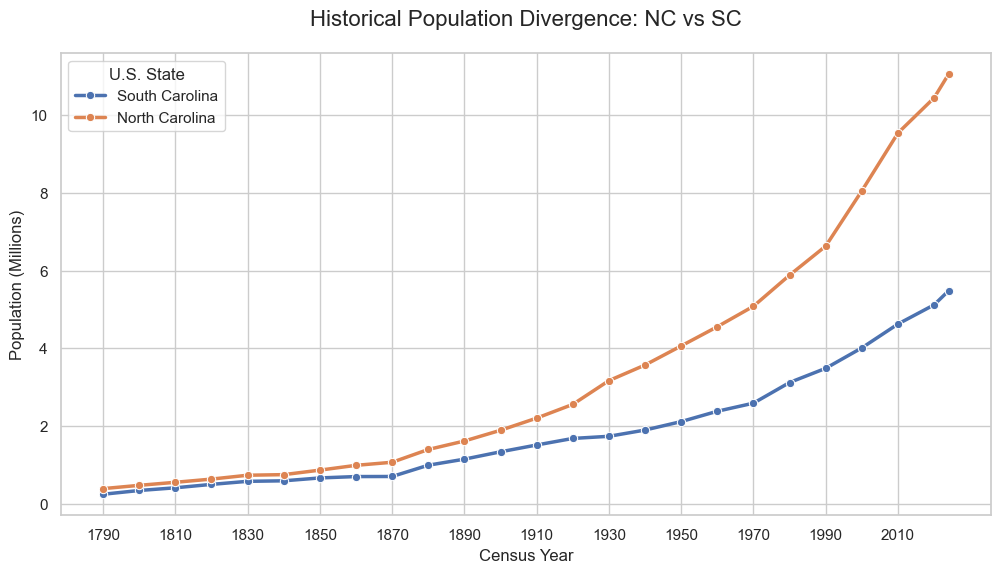

In [91]:
sns.set_theme(style="whitegrid") 

# 1. Create the figure size
plt.figure(figsize=(12, 6))

# 2. Plot with 'hue' to separate the states
# Note: I'm dividing Population by 1,000,000 for clarity
ax = sns.lineplot(
    data=combined, 
    x="Census", 
    y=combined["Population"] / 1000000, 
    hue="State",      # Creates the lines
    marker="o",       # Adds dots at each census year
    linewidth=2.5
)

# 3. Add Titles and Labels
plt.title("Historical Population Divergence: NC vs SC", fontsize=16, pad=20)
plt.xlabel("Census Year", fontsize=12)
plt.ylabel("Population (Millions)", fontsize=12)

# 4. Clean up the X-axis
plt.xticks(range(1790, 2030, 20))

# 5. Add a legend
plt.legend(title="U.S. State", frameon=True)
# Save image
plt.savefig('nc_sc_population_growth.png', dpi=300, bbox_inches='tight')

plt.show()